## libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Data Import 

In [2]:
df_purchase = pd.read_csv('purchase data.csv')

## Data Exploration

In [3]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
df_purchase.isna().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

## Data Segmentation
### Import Segmentation model

In [5]:
kmeans_pca = joblib.load('model_pca')

In [6]:
pca = joblib.load('pca')

In [7]:
scale = joblib.load('scaler')

### Standarization

In [8]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_std = scale.transform(features)

### PCA

In [9]:
df_purchase_segm_std = pca.transform(df_purchase_std)

### K-Means -PCA

In [10]:
# Predict model 

purchase_predictor = kmeans_pca.predict(df_purchase_segm_std)

In [11]:
# make copy of original df
df_purchase_predictor= df_purchase.copy()

In [12]:
# create Segment
df_purchase_predictor['segment'] = purchase_predictor
df_purchase_predictor.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


## 𝐃𝐞𝐬𝐜𝐫𝐢𝐩𝐭𝐢𝐯𝐞 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬 𝐛𝐲 𝐒𝐞𝐠𝐦𝐞𝐧𝐭𝐬 
### 𝐃𝐚𝐭𝐚 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬 𝐛𝐲 𝐂𝐮𝐬𝐭𝐨𝐦𝐞𝐫

In [13]:
df_purchase_predictor.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [14]:
# Purchase occasions by customer ID
temp1 = df_purchase_predictor[['ID', 'Incidence']].groupby('ID').count()
temp1.columns = ['No. Visit']
temp1.head()

,No. Visit
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [15]:
# Number of purchases per customer ID
temp2 = df_purchase_predictor[['ID', 'Incidence']].groupby('ID').sum()
temp2.columns = ['No. purchases']
temp3 = temp1.join(temp2)
temp3.head()

,No. Visit,No. purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [16]:
# Average number of purchases by customer ID
temp3['avg_of_purchases'] = temp3['No. purchases']/temp3['No. Visit']
temp3.head()

,No. Visit,No. purchases,avg_of_purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [17]:
# We obtain the segment for each customer in the data set.
temp4 = df_purchase_predictor[['ID', 'segment']].groupby('ID').mean()
df_segment_descr = temp3.join(temp4)
df_segment_descr.head()

,No. Visit,No. purchases,avg_of_purchases,segment
ID,,,,
200000001,101,9,0.089109,2.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,2.0
200000004,85,11,0.129412,2.0
200000005,111,13,0.117117,1.0


In [18]:
df_segment_descr['segment']= df_segment_descr['segment'].astype(int)

### 𝐒𝐞𝐠𝐦𝐞𝐧𝐭 𝐏𝐫𝐨𝐩𝐨𝐫𝐭𝐢𝐨𝐧𝐬 

In [19]:
# We calculate the proportions of each segment and set the appropriate column name.
sem_prop = df_segment_descr[['segment', 'No. purchases']].groupby('segment').count()/df_segment_descr.shape[0]
sem_prop.head()

,No. purchases
segment,
0,0.206
1,0.220
2,0.378
3,0.196


In [20]:
sem_prop.columns=['segment_prop']
sem_prop

,segment_prop
segment,
0,0.206
1,0.220
2,0.378
3,0.196


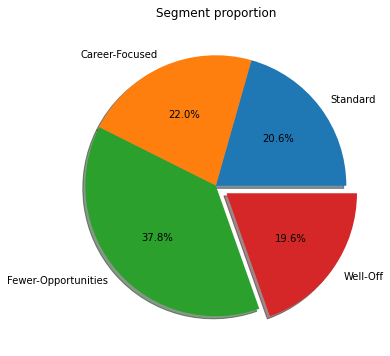

In [21]:
plt.figure(figsize = [6,6])
plt.pie(sem_prop['segment_prop'], 
        labels=['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'],
       autopct='%1.1f%%',explode = [0.0, 0.0,0.0, 0.1 ], shadow=True)
plt.title('Segment proportion')
plt.show()

### 𝐏𝐮𝐫𝐜𝐡𝐚𝐬𝐞 𝐎𝐜𝐜𝐚𝐬𝐢𝐨𝐧 𝐚𝐧𝐝 𝐏𝐮𝐫𝐜𝐡𝐚𝐬𝐞 𝐈𝐧𝐜𝐢𝐝𝐞𝐧𝐜𝐞

In [22]:
# We calculate the mean by the four segments. It will help us determine the average customer behaivour
segments_mean = df_segment_descr.groupby('segment').mean()
segments_mean

,No. Visit,No. purchases,avg_of_purchases
segment,,,
0,117.699029,24.902913,0.212773
1,123.454545,39.827273,0.283102
2,113.730159,22.756614,0.201588
3,117.295918,34.602041,0.284478


In [23]:
segments_std = df_segment_descr.groupby('segment').std()
segments_std

,No. Visit,No. purchases,avg_of_purchases
segment,,,
0,19.039605,16.774464,0.126603
1,44.864656,53.744530,0.200056
2,16.410498,13.815040,0.120335
3,20.716152,25.900579,0.171787


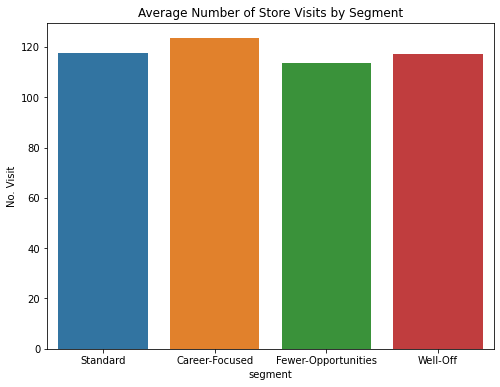

In [24]:
plt.figure(figsize = [8,6])
sns.barplot(x = segments_mean.index, y = 'No. Visit',data = segments_mean, ci="sd")
plt.xticks([0,1,2,3],['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'])
plt.title('Average Number of Store Visits by Segment')
plt.show()

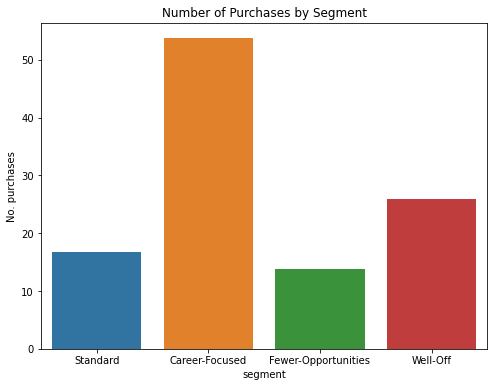

In [25]:
plt.figure(figsize = [8,6])
sns.barplot(x = segments_mean.index, y = 'No. purchases',data = segments_std, ci="sd")
plt.xticks([0,1,2,3],['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'])
plt.title('Number of Purchases by Segment')
plt.show()

## 𝐁𝐫𝐚𝐧𝐝 𝐂𝐡𝐨𝐢𝐜𝐞  

In [26]:
# Select only rows where incidence is one. In other words, we are only interested in the times a purchase was made.
df_purchase_incidence = df_purchase_predictor[df_purchase_predictor.Incidence==1]

In [27]:
df_purchase_incidence.Brand.unique()

array([2, 5, 1, 4, 3], dtype=int64)

In [28]:
# Here we make dummies for each of the five brands.
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix='brand')
# Create segment column and ID

brand_dummies['segment'] = df_purchase_incidence['segment']
brand_dummies['id'] = df_purchase_incidence.ID
brand_dummies.head()

,brand_1,brand_2,brand_3,brand_4,brand_5,segment,id
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001


In [29]:
#mean of id  brand dummies
temp =brand_dummies.groupby('id').mean()
temp.head()

,brand_1,brand_2,brand_3,brand_4,brand_5,segment
id,,,,,,
200000001,0.111111,0.444444,0.0,0.222222,0.222222,2.0
200000002,0.000000,0.090909,0.0,0.909091,0.000000,3.0
200000003,0.000000,0.800000,0.0,0.000000,0.200000,2.0
200000004,0.000000,0.090909,0.0,0.000000,0.909091,2.0
200000005,0.000000,0.000000,0.0,0.000000,1.000000,1.0


In [30]:
# Mean of df segment
mean_seg_brand = brand_dummies.groupby('segment').mean()
mean_seg_brand.head()

,brand_1,brand_2,brand_3,brand_4,brand_5,id
segment,,,,,,
0,0.205458,0.353996,0.203119,0.049513,0.187914,2.000003e+08
1,0.039489,0.092901,0.026250,0.079206,0.762155,2.000002e+08
2,0.118112,0.687747,0.027203,0.061381,0.105557,2.000003e+08
3,0.041876,0.079328,0.025951,0.645532,0.207313,2.000003e+08


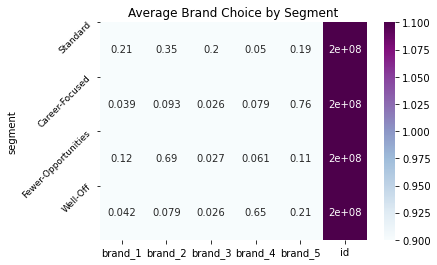

In [31]:
sns.heatmap(mean_seg_brand, annot=True,
           vmax=1, vmin=1, cmap='BuPu')
plt.yticks([0,1,2,3], ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'], 
           rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

### Revenue

In [34]:
# Compute the revenue for brand 1.
# For each entry where Brand 1 was purchased,
temp = df_purchase_predictor[df_purchase_predictor.Brand==1]
temp.head(2)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,2
556,200000006,636,1,1,5,0,0,1.31,1.56,2.00,...,0,0,0,0,39,1,112347,1,2,1


In [38]:
temp.loc[:, 'revenue_brand1'] = temp['Price_1'] * temp['Quantity']

In [39]:
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['segment','revenue_brand1']]= temp[['segment',
                                                            'revenue_brand1']].groupby('segment', 
                                                                                                 as_index=False).sum()
segments_brand_revenue

,segment,revenue_brand1
0,0,2611.19
1,1,736.09
2,2,2258.90
3,3,699.47


In [40]:
#make other revenue for each brands
temp = df_purchase_predictor[df_purchase_predictor.Brand==2]
temp.loc[:, 'revenue_brand2'] = temp['Price_2'] * temp['Quantity']

segments_brand_revenue[['segment','revenue_brand2']]= temp[['segment',
                                                            'revenue_brand2']].groupby('segment', 
                                                                                                 as_index=False).sum()


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,segment,revenue_brand1,revenue_brand2
0,0,2611.19,4768.52
1,1,736.09,1746.42
2,2,2258.90,13955.14
3,3,699.47,1298.23


In [42]:
#make other revenue for each brands
temp = df_purchase_predictor[df_purchase_predictor.Brand==3]
temp.loc[:, 'revenue_brand3'] = temp['Price_3'] * temp['Quantity']

segments_brand_revenue[['segment','revenue_brand3']]= temp[['segment',
                                                            'revenue_brand3']].groupby('segment', 
                                                                                                 as_index=False).sum()


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [43]:
#make other revenue for each brands
temp = df_purchase_predictor[df_purchase_predictor.Brand==4]
temp.loc[:, 'revenue_brand4'] = temp['Price_4'] * temp['Quantity']

segments_brand_revenue[['segment','revenue_brand4']]= temp[['segment',
                                                            'revenue_brand4']].groupby('segment', 
                                                                                                 as_index=False).sum()


In [44]:
#make other revenue for each brands
temp = df_purchase_predictor[df_purchase_predictor.Brand==5]
temp.loc[:, 'revenue_brand5'] = temp['Price_5'] * temp['Quantity']

segments_brand_revenue[['segment','revenue_brand5']]= temp[['segment',
                                                            'revenue_brand5']].groupby('segment', 
                                                                                                 as_index=False).sum()


In [46]:
segments_brand_revenue['total_revenue'] = (segments_brand_revenue.revenue_brand1 +
segments_brand_revenue.revenue_brand2 + segments_brand_revenue.revenue_brand3 +
segments_brand_revenue.revenue_brand4 + segments_brand_revenue.revenue_brand5)


segments_brand_revenue

,segment,revenue_brand1,revenue_brand2,revenue_brand3,revenue_brand4,revenue_brand5,total_revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [49]:
# add prop colomuns 
segments_brand_revenue['segment_prop'] = sem_prop['segment_prop']
segments_brand_revenue['segment'] = segments_brand_revenue['segment'].map({0:'Standard',
                                                                           1:'Career-Focused',
                                                                           2:'Fewer-Opportunities',
                                                                           3:'Well-Off'})

In [ ]:
segments_brand_revenue.s